<div style="border: 5px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">Projet 9</h3>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.0 - Importation des librairies</h3>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from pathlib import Path

In [2]:
Path.cwd()

WindowsPath('C:/Users/Utilisateur/Documents/Projet9')

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies Statistiques</h3>
</div>

In [3]:
#Bibliothèques pour le calcul des courbes gaussiennes
from scipy.stats import norm
#Bibliothèques pour le calcul du test Shapiro-Wilk  (Test de normalité)
from scipy.stats import shapiro
#Bibliothèques pour le calcul du test Chi-2
from scipy.stats import chi2_contingency
#Bibliothèques pour le test de Pearson
from scipy.stats import pearsonr
#Bibliothèques pour le test Anova
from scipy.stats import f_oneway
#Bibliothèques pour le test de Spearman
from scipy.stats import spearmanr
#Bibliothèques pour le test de Fischer 
from scipy.stats import fisher_exact
#Bibliothèques pour le T-Test 
from scipy.stats import ttest_ind
#Bibliothèque pour calculer la tendance
from scipy.stats import linregress

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2- Importation des 3 dataframes non-nettoyés</h3>
</div>

In [4]:
#dfc Dataframe customers
dfc = pd.read_csv('C:/Users/Utilisateur/Documents/Projet9/Donnees/non-nettoyées/customers.csv')
#dft Dataframe transactions
dft = pd.read_csv('C:/Users/Utilisateur/Documents/Projet9/Donnees/non-nettoyées/transactions.csv')
#dfp Dataframe products
dfp = pd.read_csv('C:/Users/Utilisateur/Documents/Projet9/Donnees/non-nettoyées/products.csv')

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.0 - Nettoyage des données</h3>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Contrôle et Nettoyage des données Clients (dfc)</h3>
</div>

In [5]:
#Contrôles des caractéristiques des données importés
dfc.dtypes

client_id    object
sex          object
birth         int64
dtype: object

In [6]:
#Controle nombre de lignes et colonnes
dfc.shape

(8623, 3)

In [7]:
#Vérification des types de valeurs
dfc["sex"].value_counts()

sex
f    4491
m    4132
Name: count, dtype: int64

In [8]:
#Controle des doublons
dfc.duplicated().sum()

0

In [9]:
#Vérification des valeurs dates de naissance nulles
dfc[dfc["birth"].isnull()]

,client_id,sex,birth


Text(0, 0.5, 'Année')

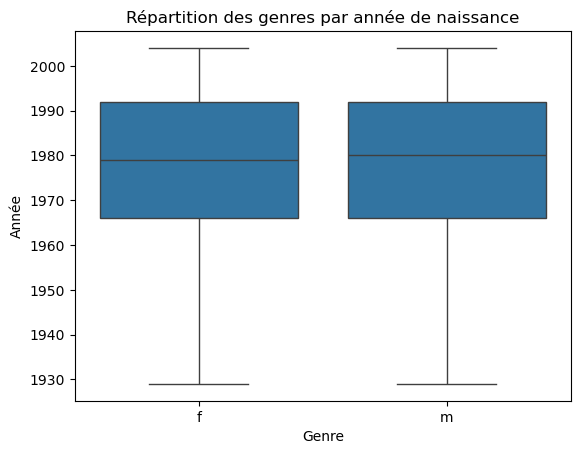

In [10]:
#Vérification de la distribution des années de naissance par sexe
sns.boxplot(x="sex", y="birth", data=dfc)
plt.title('Répartition des genres par année de naissance')
plt.xlabel('Genre')
plt.ylabel('Année')

In [11]:
dfc.sort_values("client_id")

,client_id,sex,birth
4299,c_1,m,1955
6894,c_10,m,1956
2137,c_100,m,1992
8472,c_1000,f,1966
3426,c_1001,m,1982
...,...,...,...
94,c_997,f,1994
2145,c_998,m,2001
7358,c_999,m,1964
2735,ct_0,f,2001


In [12]:
#Suppression des deux clients tests "ct_0 et ct-1"
dfc = dfc[~dfc['client_id'].isin(["ct_0","ct_1"])]

In [13]:
dfc.shape

(8621, 3)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Contrôle et Nettoyage des données Transactions (dft)</h3>
</div>

In [14]:
#Controle des caractéristiques
dft.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

In [15]:
dft.shape

(679532, 4)

In [16]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [17]:
#identification des valeurs nulls
dft.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [18]:
#Contrôle des doublons
dft[dft.duplicated()]

,id_prod,date,session_id,client_id
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [19]:
#Identification des valeurs de test
dft[dft['date'].str.contains("test_")]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [20]:
#Suppression des valeurs de test
dft=dft[~dft['date'].str.contains("test_")]

In [21]:
#conversion de la colonne date en date
dft["date"]=pd.to_datetime(dft["date"], errors = 'coerce')

In [22]:
dft.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

In [23]:
#Vérification des dates nulles
dft.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [24]:
#Controles des valeurs nulles
dft[dft["date"].isnull()]

,id_prod,date,session_id,client_id


In [25]:
#Suppression des valeurs dates nulles
dft=dft[dft["date"].notnull()]

In [26]:
dft.shape

(679332, 4)

In [27]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Contrôle et Nettoyage des données Products (dfp)</h3>
</div>

In [28]:
dfp.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

In [29]:
dfp.shape

(3287, 3)

In [30]:
dfp.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [31]:
#Constat que 1ere lettre idprod = categorie

In [32]:
dfp.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [33]:
#Identification de la valeur négative
dfp[dfp["price"]==dfp["price"].min()]

,id_prod,price,categ
731,T_0,-1.0,0


In [34]:
dfp = dfp[~dfp['id_prod'].isin(["T_0"])]

In [35]:
#Contrôle des doublons
dfp.duplicated().sum()

0

In [36]:
#Vérification des typologies de catégories
dfp['categ'].value_counts()

categ
0    2308
1     739
2     239
Name: count, dtype: int64

Text(0, 0.5, 'Prix')

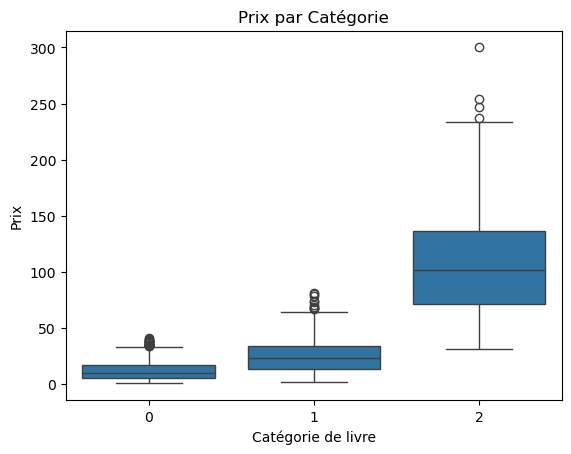

In [37]:
#Analyse des catégories au regard des prix
sns.boxplot(x="categ", y="price", data=dfp)
plt.title('Prix par Catégorie')
plt.xlabel('Catégorie de livre')
plt.ylabel('Prix')

In [38]:
(dfp.loc[dfp['price'].notnull()]).sort_values("price",ascending = False)

,id_prod,price,categ
947,2_2,300.00,2
724,2_76,254.44,2
394,2_158,247.22,2
1436,2_167,236.99,2
2779,2_30,233.54,2
...,...,...,...
1530,0_1620,0.80,0
1211,0_1844,0.77,0
370,0_120,0.66,0
2272,0_528,0.62,0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.0 - Jointure des tables</h3>
</div>

In [39]:
#Jointure de la table clients et transactions
df= pd.merge(dfc, dft, on ='client_id', how="outer", indicator='Merge1')

In [40]:
df.dtypes

client_id             object
sex                   object
birth                  int64
id_prod               object
date          datetime64[ns]
session_id            object
Merge1              category
dtype: object

In [41]:
#Jointure finale (dff) de la nouvelle table avec product en mode outer pour constater les produits sans mouvement
dff=pd.merge(df, dfp, on ='id_prod', how="outer", indicator='Merge2')

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4 - Analyse des données du DataFrame final</h3>
</div>

In [42]:
#Identification des cas sans correspondances lors du merge
dff[(dff["Merge1"]!="both")|(dff["Merge2"]!="both")].head(50)

,client_id,sex,birth,id_prod,date,session_id,Merge1,price,categ,Merge2
6073,NaN,NaN,NaN,0_1014,NaT,NaN,NaN,1.15,0.0,right_only
6511,NaN,NaN,NaN,0_1016,NaT,NaN,NaN,35.06,0.0,right_only
8723,NaN,NaN,NaN,0_1025,NaT,NaN,NaN,24.99,0.0,right_only
21687,NaN,NaN,NaN,0_1062,NaT,NaN,NaN,20.08,0.0,right_only
40971,NaN,NaN,NaN,0_1119,NaT,NaN,NaN,2.99,0.0,right_only
94245,NaN,NaN,NaN,0_1318,NaT,NaN,NaN,20.92,0.0,right_only
297077,NaN,NaN,NaN,0_1620,NaT,NaN,NaN,0.80,0.0,right_only
299185,NaN,NaN,NaN,0_1624,NaT,NaN,NaN,24.50,0.0,right_only
311123,NaN,NaN,NaN,0_1645,NaT,NaN,NaN,2.99,0.0,right_only
323013,NaN,NaN,NaN,0_1780,NaT,NaN,NaN,1.67,0.0,right_only


In [43]:
dff[dff['id_prod'].notnull()]

,client_id,sex,birth,id_prod,date,session_id,Merge1,price,categ,Merge2
0,c_1004,m,1973.0,0_0,2021-03-02 21:57:33.862118,s_908,both,3.75,0.0,both
1,c_1011,f,1999.0,0_0,2022-03-18 16:40:10.068303,s_180968,both,3.75,0.0,both
2,c_1011,f,1999.0,0_0,2022-02-18 16:40:10.068303,s_167174,both,3.75,0.0,both
3,c_1011,f,1999.0,0_0,2022-04-18 16:40:10.068303,s_195932,both,3.75,0.0,both
4,c_1011,f,1999.0,0_0,2023-02-18 16:40:10.068303,s_343439,both,3.75,0.0,both
...,...,...,...,...,...,...,...,...,...,...
679348,c_5828,f,1998.0,2_99,2022-07-21 01:53:46.967570,s_241374,both,84.99,2.0,both
679349,c_5828,f,1998.0,2_99,2023-01-21 01:53:46.967570,s_329932,both,84.99,2.0,both
679350,c_7135,m,1996.0,2_99,2022-11-11 20:56:49.820935,s_296127,both,84.99,2.0,both
679351,c_7135,m,1996.0,2_99,2022-12-11 20:56:49.820935,s_310606,both,84.99,2.0,both


In [44]:
dff[dff['id_prod'].astype(str).str.contains("0_")&dff['price'].isnull()]

,client_id,sex,birth,id_prod,date,session_id,Merge1,price,categ,Merge2
380106,c_1025,m,1984.0,0_2245,2022-07-29 04:29:29.995701,s_245285,both,NaN,NaN,left_only
380107,c_1025,m,1984.0,0_2245,2021-03-29 04:29:29.995701,s_12938,both,NaN,NaN,left_only
380108,c_1025,m,1984.0,0_2245,2022-07-29 02:10:32.403467,s_245233,both,NaN,NaN,left_only
380109,c_1025,m,1984.0,0_2245,2021-03-29 02:10:32.403467,s_12886,both,NaN,NaN,left_only
380110,c_1060,f,1973.0,0_2245,2022-10-06 14:03:40.171938,s_278588,both,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...
380322,c_8595,f,1980.0,0_2245,2022-01-04 19:02:47.712837,s_144966,both,NaN,NaN,left_only
380323,c_8595,f,1980.0,0_2245,2022-05-04 19:02:47.712837,s_203643,both,NaN,NaN,left_only
380324,c_8616,m,1984.0,0_2245,2022-03-25 17:07:45.271509,s_184453,both,NaN,NaN,left_only
380325,c_8616,m,1984.0,0_2245,2021-09-25 17:07:45.271509,s_95396,both,NaN,NaN,left_only


In [45]:
#forcer la moyenne pour valeurs prices en NAN selon qu'il s'agissent d'une catégorie 0,1,2 identifié par le nom du produit
mean_price = dff[dff['id_prod'].astype(str).str.contains("0_")&dff['price'].notnull()]['price'].mean()
#dff.loc[dff['price'].isnull() & dff['id_prod'].notnull(), 'price'] = mean_price
dff['price'] = dff.apply(lambda row: mean_price if pd.isnull(row['price']) and pd.notnull(row['id_prod']) else row['price'], axis=1)

In [46]:
mean_price

10.638329694927496

In [47]:
#Retrait du dataframe des clients sans achat
dff=dff[~dff['id_prod'].isnull()]

In [48]:
#Identification des catégories NA alors que ID prod est connue :
dff[dff['categ'].isnull()&dff['id_prod'].notnull()]

,client_id,sex,birth,id_prod,date,session_id,Merge1,price,categ,Merge2
380106,c_1025,m,1984.0,0_2245,2022-07-29 04:29:29.995701,s_245285,both,10.63833,NaN,left_only
380107,c_1025,m,1984.0,0_2245,2021-03-29 04:29:29.995701,s_12938,both,10.63833,NaN,left_only
380108,c_1025,m,1984.0,0_2245,2022-07-29 02:10:32.403467,s_245233,both,10.63833,NaN,left_only
380109,c_1025,m,1984.0,0_2245,2021-03-29 02:10:32.403467,s_12886,both,10.63833,NaN,left_only
380110,c_1060,f,1973.0,0_2245,2022-10-06 14:03:40.171938,s_278588,both,10.63833,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...
380322,c_8595,f,1980.0,0_2245,2022-01-04 19:02:47.712837,s_144966,both,10.63833,NaN,left_only
380323,c_8595,f,1980.0,0_2245,2022-05-04 19:02:47.712837,s_203643,both,10.63833,NaN,left_only
380324,c_8616,m,1984.0,0_2245,2022-03-25 17:07:45.271509,s_184453,both,10.63833,NaN,left_only
380325,c_8616,m,1984.0,0_2245,2021-09-25 17:07:45.271509,s_95396,both,10.63833,NaN,left_only


In [49]:
dff['categ'] = dff.apply(lambda row: 0.0 if pd.isnull(row['categ']) and pd.notnull(row['id_prod']) else row['categ'], axis=1)

In [50]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 679353 entries, 0 to 679352
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   client_id   679332 non-null  object        
 1   sex         679332 non-null  object        
 2   birth       679332 non-null  float64       
 3   id_prod     679353 non-null  object        
 4   date        679332 non-null  datetime64[ns]
 5   session_id  679332 non-null  object        
 6   Merge1      679332 non-null  category      
 7   price       679353 non-null  float64       
 8   categ       679353 non-null  float64       
 9   Merge2      679353 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(3), object(4)
memory usage: 47.9+ MB


In [51]:
#Controle nombre de ligne et colonne
dff.shape

(679353, 10)

In [52]:
dff.dtypes

client_id             object
sex                   object
birth                float64
id_prod               object
date          datetime64[ns]
session_id            object
Merge1              category
price                float64
categ                float64
Merge2              category
dtype: object

In [53]:
#Aperçu des données importé
dff.head()

,client_id,sex,birth,id_prod,date,session_id,Merge1,price,categ,Merge2
0,c_1004,m,1973.0,0_0,2021-03-02 21:57:33.862118,s_908,both,3.75,0.0,both
1,c_1011,f,1999.0,0_0,2022-03-18 16:40:10.068303,s_180968,both,3.75,0.0,both
2,c_1011,f,1999.0,0_0,2022-02-18 16:40:10.068303,s_167174,both,3.75,0.0,both
3,c_1011,f,1999.0,0_0,2022-04-18 16:40:10.068303,s_195932,both,3.75,0.0,both
4,c_1011,f,1999.0,0_0,2023-02-18 16:40:10.068303,s_343439,both,3.75,0.0,both


In [54]:
dff[dff["client_id"].isnull()]

,client_id,sex,birth,id_prod,date,session_id,Merge1,price,categ,Merge2
6073,NaN,NaN,NaN,0_1014,NaT,NaN,NaN,1.15,0.0,right_only
6511,NaN,NaN,NaN,0_1016,NaT,NaN,NaN,35.06,0.0,right_only
8723,NaN,NaN,NaN,0_1025,NaT,NaN,NaN,24.99,0.0,right_only
21687,NaN,NaN,NaN,0_1062,NaT,NaN,NaN,20.08,0.0,right_only
40971,NaN,NaN,NaN,0_1119,NaT,NaN,NaN,2.99,0.0,right_only
94245,NaN,NaN,NaN,0_1318,NaT,NaN,NaN,20.92,0.0,right_only
297077,NaN,NaN,NaN,0_1620,NaT,NaN,NaN,0.80,0.0,right_only
299185,NaN,NaN,NaN,0_1624,NaT,NaN,NaN,24.50,0.0,right_only
311123,NaN,NaN,NaN,0_1645,NaT,NaN,NaN,2.99,0.0,right_only
323013,NaN,NaN,NaN,0_1780,NaT,NaN,NaN,1.67,0.0,right_only


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.1 - Chiffre d'affaire avec la moyenne mobile(ca)</h3>
</div>

In [55]:
#création d'un regroupement par date jour et par prix appelé ca (chiffre d'affaire)
ca = dff.groupby([dff['date'].dt.date, 'categ'])['price'].sum().reset_index()

In [56]:
#Renommer la colonne price 
ca.columns = ['Date', 'categorie', 'chiffre_affaires']

In [57]:
ca.head(5)

,Date,categorie,chiffre_affaires
0,2021-03-01,0.0,6273.28833
1,2021-03-01,1.0,6811.53000
2,2021-03-01,2.0,3491.04000
3,2021-03-02,0.0,6728.90833
4,2021-03-02,1.0,5627.15000


In [58]:
#Ajout d'une colonne Moyenne mobile sur 30 jours au DataFrame CA (Chiffre d'Affaires)
ca["moyenne_mobile"] = ca["chiffre_affaires"].rolling(window=30).mean()

In [59]:
ca.head(10)

,Date,categorie,chiffre_affaires,moyenne_mobile
0,2021-03-01,0.0,6273.28833,NaN
1,2021-03-01,1.0,6811.53000,NaN
2,2021-03-01,2.0,3491.04000,NaN
3,2021-03-02,0.0,6728.90833,NaN
4,2021-03-02,1.0,5627.15000,NaN
5,2021-03-02,2.0,3141.03000,NaN
6,2021-03-03,0.0,6121.03000,NaN
7,2021-03-03,1.0,5691.41000,NaN
8,2021-03-03,2.0,3386.25000,NaN
9,2021-03-04,0.0,5891.48000,NaN


In [60]:
ca.count()

Date                2164
categorie           2164
chiffre_affaires    2164
moyenne_mobile      2135
dtype: int64

In [61]:
#Calcule de la tendance sur base de la moyenne mobile
#Retrait des na de la moyenne mobile dans une série"valid"
valid = ca["moyenne_mobile"].dropna()
#Création d'un vecteur x
x = np.arange(len(valid))
#Récupération des valeurs numériques de la moyenne mobile
y = valid.values
slope, intercept, r_value, p_value, std_err = linregress(x, y)
tendance = slope * x + intercept

In [62]:
#Ajout de la colonne tendance au Dataframe ca
ca.loc[valid.index, 'tendance'] = tendance

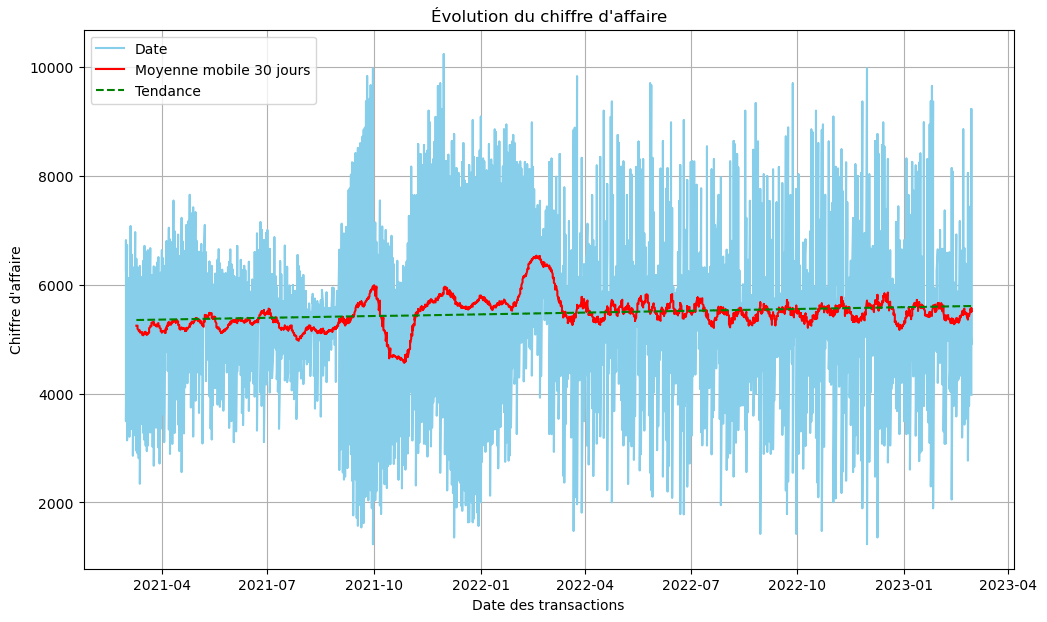

In [63]:
#Tracé du graphique avec moyenne mobile et tendance
plt.figure(figsize=(12, 7))
plt.plot(ca['Date'], ca['chiffre_affaires'], linestyle='-', color='skyblue', label="Date")
plt.plot(ca['Date'], ca['chiffre_affaires'].rolling(30).mean(), linestyle='-', color='red', label="Moyenne mobile 30 jours")
plt.plot(ca['Date'], ca['tendance'], label='Tendance', linestyle='--', color='green')

plt.legend()

plt.title("Évolution du chiffre d'affaire")
plt.xlabel('Date des transactions')
plt.ylabel("Chiffre d'affaire")
plt.grid(True)
plt.show()

In [64]:
ca["Date"]=pd.to_datetime(ca['Date'])

In [65]:
#Identification des anomalies sur la périodes octobre 2021 "pas de categorie 1 disponibles  du 2 au 28 octobre?"
(ca.loc[(ca['Date'] >= '2021, 10, 2')&(ca['Date'] < '2021, 10, 28')])["categorie"].value_counts()


categorie
0.0    26
2.0    26
Name: count, dtype: int64

In [66]:
dff

,client_id,sex,birth,id_prod,date,session_id,Merge1,price,categ,Merge2
0,c_1004,m,1973.0,0_0,2021-03-02 21:57:33.862118,s_908,both,3.75,0.0,both
1,c_1011,f,1999.0,0_0,2022-03-18 16:40:10.068303,s_180968,both,3.75,0.0,both
2,c_1011,f,1999.0,0_0,2022-02-18 16:40:10.068303,s_167174,both,3.75,0.0,both
3,c_1011,f,1999.0,0_0,2022-04-18 16:40:10.068303,s_195932,both,3.75,0.0,both
4,c_1011,f,1999.0,0_0,2023-02-18 16:40:10.068303,s_343439,both,3.75,0.0,both
...,...,...,...,...,...,...,...,...,...,...
679348,c_5828,f,1998.0,2_99,2022-07-21 01:53:46.967570,s_241374,both,84.99,2.0,both
679349,c_5828,f,1998.0,2_99,2023-01-21 01:53:46.967570,s_329932,both,84.99,2.0,both
679350,c_7135,m,1996.0,2_99,2022-11-11 20:56:49.820935,s_296127,both,84.99,2.0,both
679351,c_7135,m,1996.0,2_99,2022-12-11 20:56:49.820935,s_310606,both,84.99,2.0,both


In [67]:
#Suppression des transactions du mois d'octobre 2021 pour retirer les biais dans les stratistiques dans le dataFrame finale
dff=dff[~dff["date"].between("2021-10-01", "2021-10-28")]

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.2 - Chiffre d'affaires par catégorie(cac)</h3>
</div>

In [68]:
cac = dff.groupby('categ')['price'].sum().reset_index()

In [69]:
cac.columns= ["Categorie", "Chiffre d'affaires"]

In [70]:
cac

,Categorie,Chiffre d'affaires
0,0.0,4.246893e+06
1,1.0,4.646790e+06
2,2.0,2.705323e+06


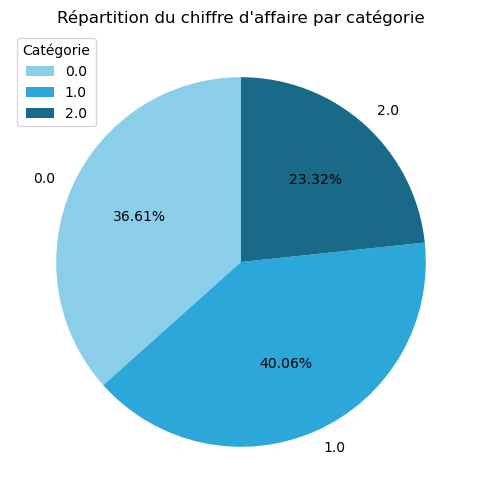

In [71]:
plt.figure(figsize=(6, 6))
plt.pie(cac["Chiffre d'affaires"], labels=(cac["Categorie"]), autopct='%1.2f%%', startangle=90, colors=['#8ACEEA', '#2BA7D9','#196989'])
plt.title("Répartition du chiffre d'affaire par catégorie")
plt.legend(title='Catégorie')
plt.show()


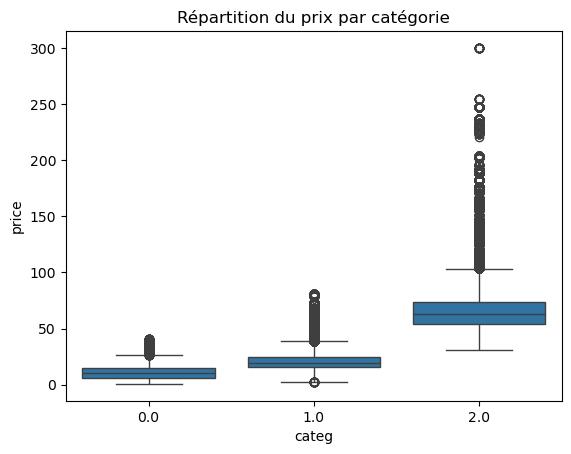

In [72]:
sns.boxplot(x="categ", y="price", data=dff)
plt.title("Répartition du prix par catégorie")
plt.show()

In [73]:
dff.sort_values(["price"],ascending = False)

,client_id,sex,birth,id_prod,date,session_id,Merge1,price,categ,Merge2
664919,c_2467,f,1997.0,2_2,2022-12-06 23:14:33.815188,s_308128,both,300.00,2.0,both
664916,c_1001,m,1982.0,2_2,2021-03-07 14:07:31.004391,s_3041,both,300.00,2.0,both
664923,c_4958,m,1999.0,2_2,2022-08-07 06:52:26.810576,s_249625,both,300.00,2.0,both
664924,c_4958,m,1999.0,2_2,2021-12-04 15:45:14.708313,s_129351,both,300.00,2.0,both
664925,c_4958,m,1999.0,2_2,2021-03-26 04:33:19.697459,s_11582,both,300.00,2.0,both
...,...,...,...,...,...,...,...,...,...,...
398485,c_7075,m,1988.0,0_528,2021-06-20 20:31:40.948364,s_51439,both,0.62,0.0,both
345469,c_2069,m,1986.0,0_202,2022-01-06 18:57:12.656309,s_145956,both,0.62,0.0,both
345468,c_1367,f,1984.0,0_202,2021-08-02 23:27:31.721723,s_70595,both,0.62,0.0,both
345475,c_5510,f,1941.0,0_202,2021-05-14 15:26:20.597059,s_34456,both,0.62,0.0,both


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.3 - Nombre de clients par mois (ncm)</h3>
</div>

In [74]:
dff

,client_id,sex,birth,id_prod,date,session_id,Merge1,price,categ,Merge2
0,c_1004,m,1973.0,0_0,2021-03-02 21:57:33.862118,s_908,both,3.75,0.0,both
1,c_1011,f,1999.0,0_0,2022-03-18 16:40:10.068303,s_180968,both,3.75,0.0,both
2,c_1011,f,1999.0,0_0,2022-02-18 16:40:10.068303,s_167174,both,3.75,0.0,both
3,c_1011,f,1999.0,0_0,2022-04-18 16:40:10.068303,s_195932,both,3.75,0.0,both
4,c_1011,f,1999.0,0_0,2023-02-18 16:40:10.068303,s_343439,both,3.75,0.0,both
...,...,...,...,...,...,...,...,...,...,...
679348,c_5828,f,1998.0,2_99,2022-07-21 01:53:46.967570,s_241374,both,84.99,2.0,both
679349,c_5828,f,1998.0,2_99,2023-01-21 01:53:46.967570,s_329932,both,84.99,2.0,both
679350,c_7135,m,1996.0,2_99,2022-11-11 20:56:49.820935,s_296127,both,84.99,2.0,both
679351,c_7135,m,1996.0,2_99,2022-12-11 20:56:49.820935,s_310606,both,84.99,2.0,both


In [75]:
#Identification du nombre de clients (unique) par mois
dff['year'] = dff['date'].dt.year
dff['month'] = dff['date'].dt.month
ncm=dff.groupby(['year', 'month'])['client_id'].nunique().reset_index()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_10408\947263772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['year'] = dff['date'].dt.year
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_10408\947263772.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['month'] = dff['date'].dt.month


In [76]:
ncm.columns=["Année","Mois" ,"Nombre_clients"]
#Création d'une colonne date qui contient l'année, le mois et le 1er jour du mois
ncm['date'] = ncm['date'] = pd.to_datetime({
    'year': ncm['Année'].astype(int),
    'month': ncm['Mois'].astype(int),
    'day': 1
    })

In [77]:
ncm

,Année,Mois,Nombre_clients,date
0,2021.0,3.0,5676,2021-03-01
1,2021.0,4.0,5674,2021-04-01
2,2021.0,5.0,5644,2021-05-01
3,2021.0,6.0,5659,2021-06-01
4,2021.0,7.0,5672,2021-07-01
5,2021.0,8.0,5642,2021-08-01
6,2021.0,9.0,5693,2021-09-01
7,2021.0,10.0,1499,2021-10-01
8,2021.0,11.0,5875,2021-11-01
9,2021.0,12.0,5867,2021-12-01


In [78]:
#Calcule de la tendance sur base du nombre de clients
#Retrait des na dans la série"valid"
valid = ncm["Nombre_clients"].dropna()
#Création d'un vecteur x
x = np.arange(len(valid))
#Récupération des valeurs numériques
y = valid.values
slope, intercept, r_value, p_value, std_err = linregress(x, y)
tendance = slope * x + intercept
#Ajout de la colonne tendance au Dataframe ncm
ncm.loc[valid.index, 'tendance'] = tendance

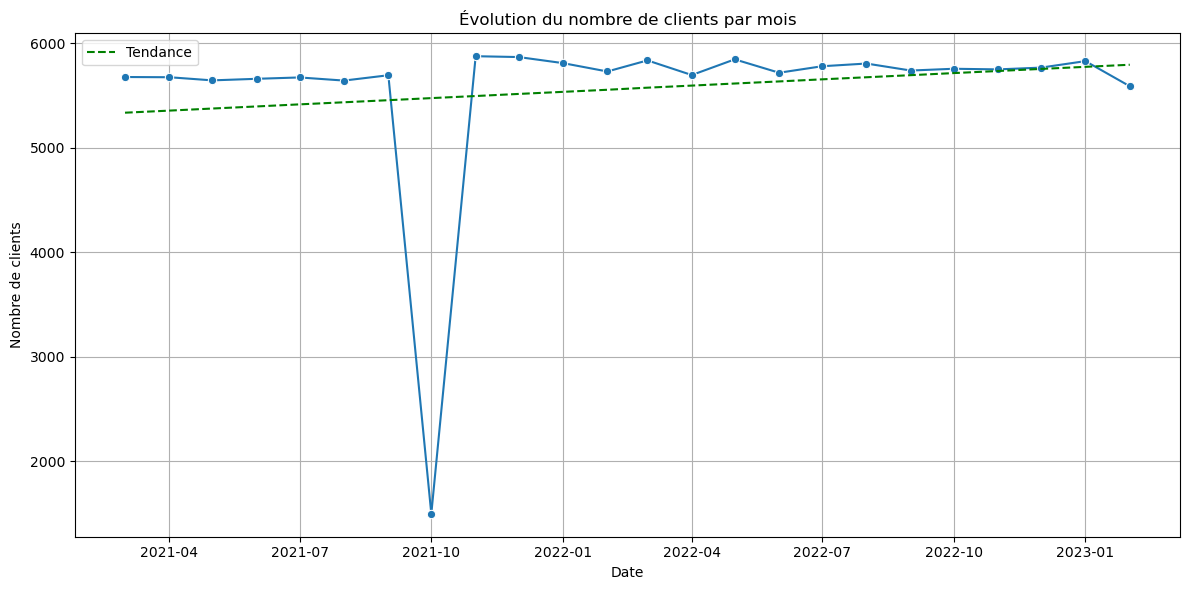

In [79]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=ncm, x='date', y='Nombre_clients', marker='o')
plt.plot(ncm['date'], ncm['tendance'], label='Tendance', linestyle='--', color='green')
plt.title("Évolution du nombre de clients par mois")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Nombre de clients")
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.4 - Nombre de transactions</h3>
</div>

In [80]:
#Identification du nombre de session par mois
nt = dff.groupby(dff['date'].dt.date)['session_id'].count().reset_index()

In [81]:
nt.columns=["Date","Nombre_de_transaction"]

In [82]:
nt["moyenne_mobile"] = nt["Nombre_de_transaction"].rolling(window=30).mean()

In [83]:
#Calcule de la tendance sur base de la moyenne mobile
#Retrait des na de la moyenne mobile dans une série"valid"
valid = nt["moyenne_mobile"].dropna()
#Création d'un vecteur x
x = np.arange(len(valid))
#Récupération des valeurs numériques de la moyenne mobile
y = valid.values
slope, intercept, r_value, p_value, std_err = linregress(x, y)
tendance = slope * x + intercept
#Ajout de la colonne tendance au Dataframe nt
nt.loc[valid.index, 'tendance'] = tendance

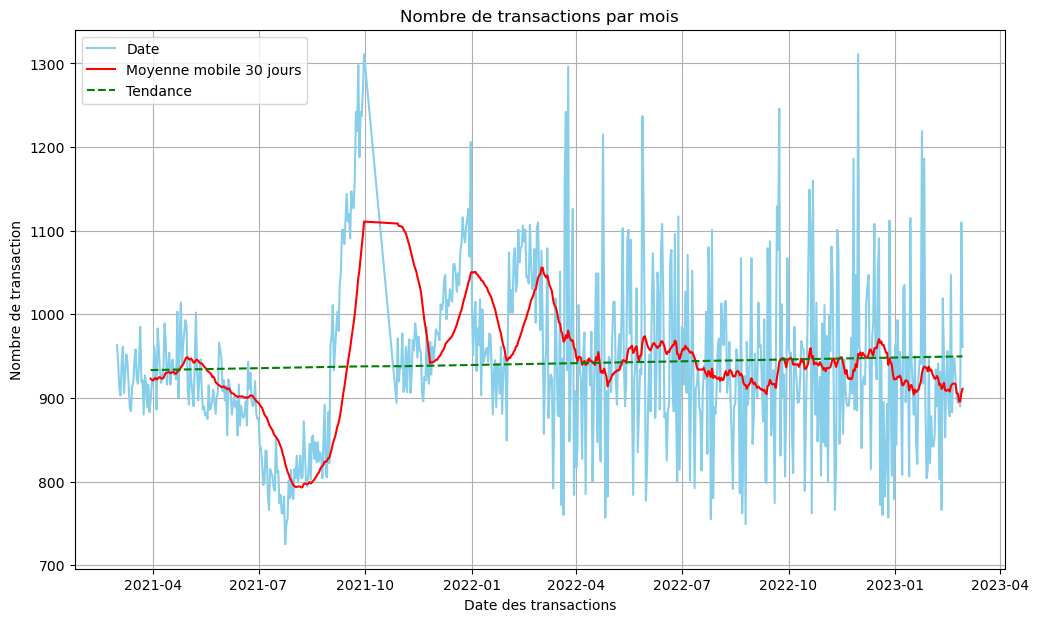

In [84]:
plt.figure(figsize=(12, 7))
plt.plot(nt['Date'], nt['Nombre_de_transaction'], linestyle='-', color='skyblue', label="Date")
plt.plot(nt['Date'], nt['Nombre_de_transaction'].rolling(30).mean(), linestyle='-', color='red', label="Moyenne mobile 30 jours")
plt.plot(nt['Date'], nt['tendance'], label='Tendance', linestyle='--', color='green')

plt.legend()

plt.title("Nombre de transactions par mois")
plt.xlabel('Date des transactions')
plt.ylabel("Nombre de transaction")
plt.grid(True)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.5 - Nombre de produit vendu avec Top,Flop, répartition par catégorie</h3>
</div>

In [85]:
dff.head(5)

,client_id,sex,birth,id_prod,date,session_id,Merge1,price,categ,Merge2,year,month
0,c_1004,m,1973.0,0_0,2021-03-02 21:57:33.862118,s_908,both,3.75,0.0,both,2021.0,3.0
1,c_1011,f,1999.0,0_0,2022-03-18 16:40:10.068303,s_180968,both,3.75,0.0,both,2022.0,3.0
2,c_1011,f,1999.0,0_0,2022-02-18 16:40:10.068303,s_167174,both,3.75,0.0,both,2022.0,2.0
3,c_1011,f,1999.0,0_0,2022-04-18 16:40:10.068303,s_195932,both,3.75,0.0,both,2022.0,4.0
4,c_1011,f,1999.0,0_0,2023-02-18 16:40:10.068303,s_343439,both,3.75,0.0,both,2023.0,2.0


In [86]:
# Groupement des produits par le nombre de clients acheteurs.
nb_product=dff.groupby(['id_prod','categ'])['client_id'].count().reset_index()

In [87]:
nb_product.head(5)

,id_prod,categ,client_id
0,0_0,0.0,1200
1,0_1,0.0,470
2,0_10,0.0,20
3,0_100,0.0,3
4,0_1000,0.0,410


In [88]:
#Renommage des colonnes Nb_ventes qui correspond au nombre de vente par produit
nb_product.columns=["id_prod", "Categorie", "Nb_Ventes"]

In [89]:
#Tri des 10 produits les plus vendus
Top10=(nb_product.sort_values(["Nb_Ventes"],ascending = False).head(10).set_index('id_prod'))

In [90]:
Top10

,Categorie,Nb_Ventes
id_prod,,
1_369,1.0,2249
1_417,1.0,2186
1_414,1.0,2176
1_498,1.0,2124
1_425,1.0,2095
1_403,1.0,1960
1_412,1.0,1947
1_413,1.0,1941
1_406,1.0,1938


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1600x1600 with 0 Axes>

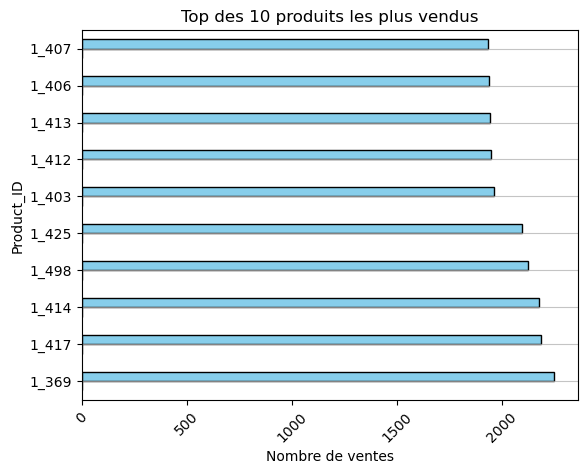

In [91]:
plt.figure(figsize=(16,16))
Top10.plot(kind="barh", color='skyblue', edgecolor='black', legend=False)
plt.title('Top des 10 produits les plus vendus')
plt.xlabel('Nombre de ventes')
plt.ylabel('Product_ID')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show

In [92]:
nb_product.head(5)

,id_prod,Categorie,Nb_Ventes
0,0_0,0.0,1200
1,0_1,0.0,470
2,0_10,0.0,20
3,0_100,0.0,3
4,0_1000,0.0,410


In [93]:
#Identification des flop sur le nombre de vente
nb_product.groupby(['Nb_Ventes']).count().reset_index().sort_values("Nb_Ventes", ascending = True).head(10)

,Nb_Ventes,id_prod,Categorie
0,0,21,21
1,1,20,20
2,2,39,39
3,3,45,45
4,4,69,69
5,5,56,56
6,6,63,63
7,7,60,60
8,8,59,59
9,9,76,76


In [94]:
#Répartition par catégories des produits vendus
rep_cat=dff.groupby(['categ'])['client_id'].count().reset_index()
rep_cat

,categ,client_id
0,0.0,399151
1,1.0,226825
2,2.0,35473


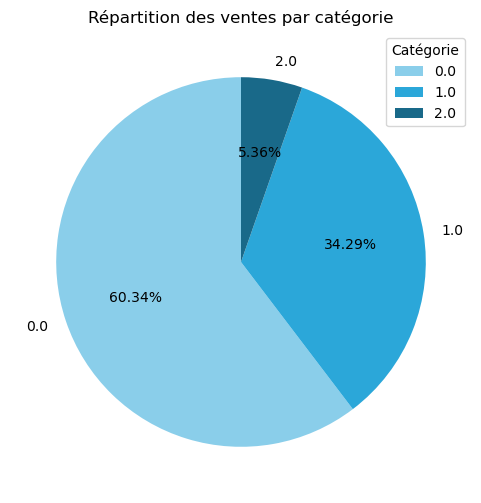

In [95]:
plt.figure(figsize=(6, 6))
plt.pie(rep_cat["client_id"], labels=(rep_cat["categ"]), autopct='%1.2f%%', startangle=90, colors=['#8ACEEA', '#2BA7D9','#196989'])
plt.title("Répartition des ventes par catégorie")
plt.legend(title='Catégorie')
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.5 - Nombre de produits vendus</h3>
</div>

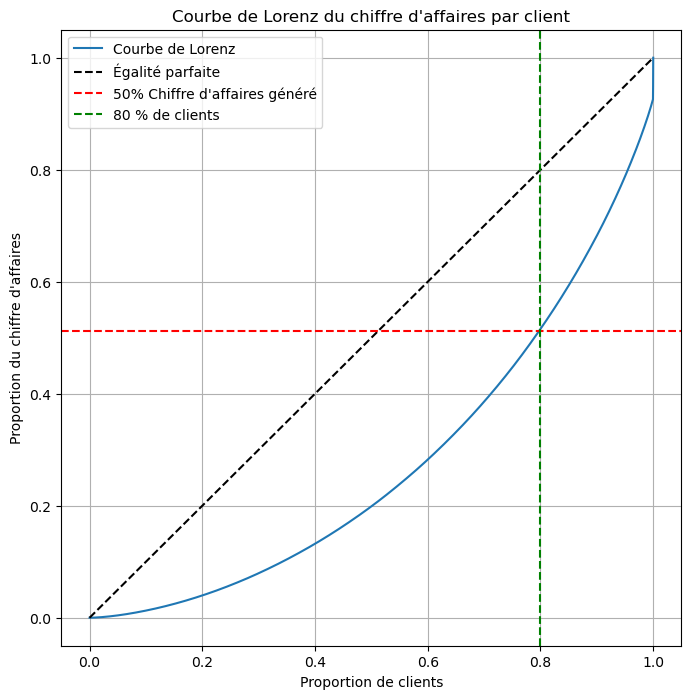

In [96]:
# Calculer le CA par client
ca_par_client = dff.groupby('client_id')['price'].sum().sort_values().values
#Calculer la somme cumulée
ca_cumsum = np.cumsum(ca_par_client)
#Normaliser afin d'être entre 0 et 1
ca_cumsum = ca_cumsum / ca_cumsum[-1]
#Création de l'axe X (proportion de clients)
x = np.linspace(0, 1, len(ca_cumsum))
#Tracer du graphique
plt.figure(figsize=(8,8))
plt.plot(x, ca_cumsum, label='Courbe de Lorenz')
plt.plot([0,1], [0,1], color='black', linestyle='--', label='Égalité parfaite')  # Diagonale
plt.title('Courbe de Lorenz du chiffre d\'affaires par client')
plt.xlabel('Proportion de clients')
plt.ylabel('Proportion du chiffre d\'affaires')
plt.axhline(y=0.512, color='r', linestyle='--', label="50% Chiffre d'affaires généré")
plt.axvline(x=0.8, color='g', linestyle='--', label='80 % de clients')

plt.legend()
plt.grid(True)
plt.show()

In [97]:
#Identification des dépenses par clients(dpc)
dpc= dff.groupby("client_id")["price"].sum().reset_index()

Text(0, 0.5, 'Prix')

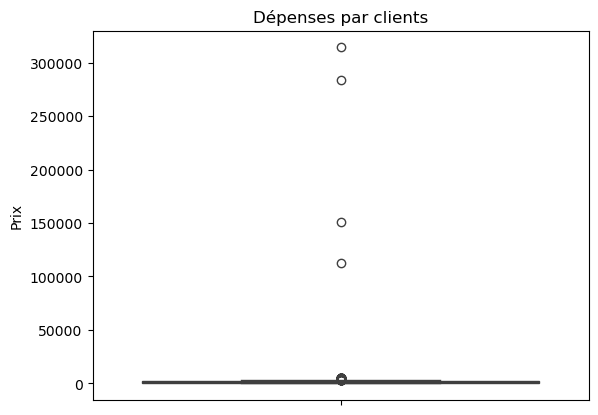

In [98]:
#Analyse des dépenses par clients
sns.boxplot(y="price", data=dpc)
plt.title('Dépenses par clients')
plt.ylabel('Prix')

In [99]:
#Identification des clients "outliner"
dpc.sort_values("price", ascending=False)

,client_id,price
677,c_1609,314373.330000
4388,c_4958,283969.910000
6337,c_6714,150583.719978
2724,c_3454,112329.844989
2108,c_2899,5214.050000
...,...,...
1991,c_2793,12.990000
4044,c_4648,11.200000
1556,c_240,11.060000
7889,c_8114,9.980000


In [100]:
#Boucle pour les clients atypiques > 100 000 de CA
Client_Atypique=[]
for index, row in dpc.iterrows():
    if row['price'] > 100000:
        Client_Atypique.append(row['client_id'])

In [101]:
Client_Atypique

['c_1609', 'c_3454', 'c_4958', 'c_6714']

In [102]:
#Calcul de la présentation des clients atypiques
dffat=dff[dff['client_id'].isin(Client_Atypique)]
print(f"Les clients atypiques représentent : {round(dffat['price'].sum()/dff['price'].sum()*100,2)} % du chiffres d'affaires")

Les clients atypiques représentent : 7.43 % du chiffres d'affaires


In [103]:
#Retrait des 4 clients (c_1609,c_4958,c_6714,c_3454) du DataFrame pour les calculs statistiques.
dff_Total = dff[~dff['client_id'].isin(Client_Atypique)]
dpc_Total = dpc[~dpc['client_id'].isin(Client_Atypique)]

Text(0.5, 0, 'CA par Clients')

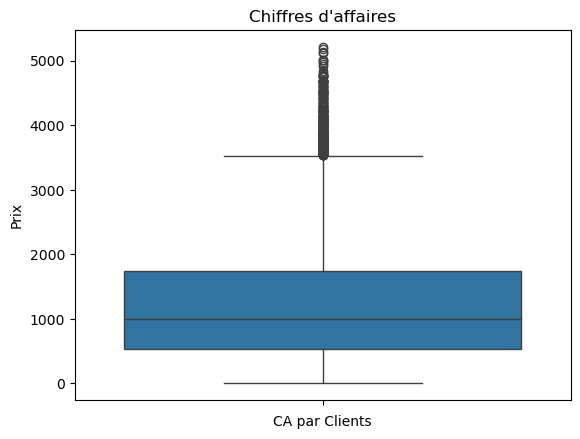

In [104]:
sns.boxplot(y="price", data=dpc_Total)
plt.title('Chiffres d\'affaires')
plt.ylabel('Prix')
plt.xlabel('CA par Clients')

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.6 - Sauvegarde du fichier finale sans les clients Atypiques</h3>
</div>

In [105]:
dff_Total.to_pickle("data_finale.pkl")

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">5 - Calculs Statistiques</h3>
</div>

In [106]:
#Calcul des DataFrame sans les 4 clients atypiques
dff_Stat = pd.read_pickle("data_finale.pkl")

In [107]:
dff_Stat

,client_id,sex,birth,id_prod,date,session_id,Merge1,price,categ,Merge2,year,month
0,c_1004,m,1973.0,0_0,2021-03-02 21:57:33.862118,s_908,both,3.75,0.0,both,2021.0,3.0
1,c_1011,f,1999.0,0_0,2022-03-18 16:40:10.068303,s_180968,both,3.75,0.0,both,2022.0,3.0
2,c_1011,f,1999.0,0_0,2022-02-18 16:40:10.068303,s_167174,both,3.75,0.0,both,2022.0,2.0
3,c_1011,f,1999.0,0_0,2022-04-18 16:40:10.068303,s_195932,both,3.75,0.0,both,2022.0,4.0
4,c_1011,f,1999.0,0_0,2023-02-18 16:40:10.068303,s_343439,both,3.75,0.0,both,2023.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
679348,c_5828,f,1998.0,2_99,2022-07-21 01:53:46.967570,s_241374,both,84.99,2.0,both,2022.0,7.0
679349,c_5828,f,1998.0,2_99,2023-01-21 01:53:46.967570,s_329932,both,84.99,2.0,both,2023.0,1.0
679350,c_7135,m,1996.0,2_99,2022-11-11 20:56:49.820935,s_296127,both,84.99,2.0,both,2022.0,11.0
679351,c_7135,m,1996.0,2_99,2022-12-11 20:56:49.820935,s_310606,both,84.99,2.0,both,2022.0,12.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">5.1 - Test de normalité des données</h3>
</div>

In [108]:
#Test de la normalité des données avec Shapiro-Wilk (2000 valeurs) sinon test de Kolmogorov-Smirnov
#Taille echantillon (nombre de valeur)
#Statistique de test
#statistique p_value

In [109]:
#identificaion de l'année en cours pour calculer l'age du client
année_en_cours=dt.datetime.now().year

In [110]:
#Ajout d'une colonne age 
dff_Stat["age"]=année_en_cours-dff_Stat["birth"]
dff_Stat['age']= dff_Stat['age'].astype('Int64')

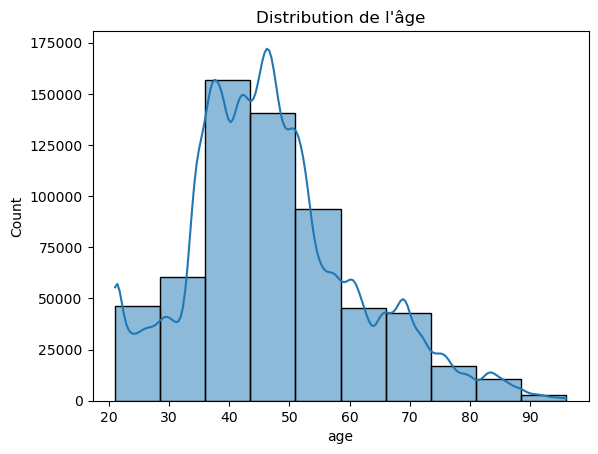

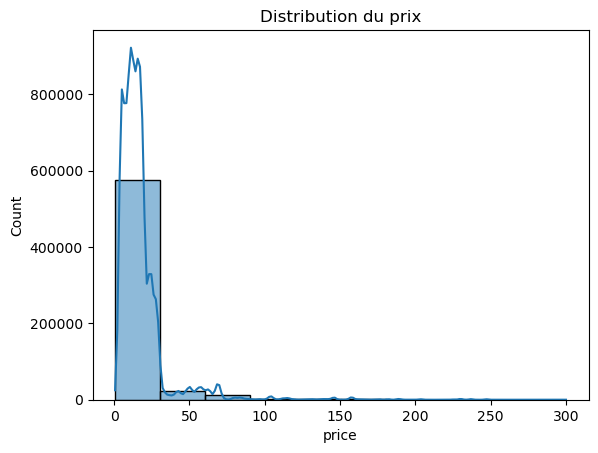

In [111]:
sns.histplot(dff_Stat['age'], kde=True, bins=10)
plt.title("Distribution de l'âge")
plt.show()

sns.histplot(dff_Stat['price'], kde=True, bins=10)
plt.title("Distribution du prix")
plt.show()

In [112]:
dff_Stat.sort_values('price', ascending=False)

,client_id,sex,birth,id_prod,date,session_id,Merge1,price,categ,Merge2,year,month,age
664929,c_659,f,2001.0,2_2,2022-02-28 21:24:28.442508,s_172373,both,300.00,2.0,both,2022.0,2.0,24
664928,c_659,f,2001.0,2_2,2022-03-28 21:24:28.442508,s_185980,both,300.00,2.0,both,2022.0,3.0,24
664927,c_5237,m,1999.0,2_2,2022-08-12 08:44:00.882917,s_252144,both,300.00,2.0,both,2022.0,8.0,26
664926,c_5237,m,1999.0,2_2,2021-06-12 08:44:00.882917,s_47558,both,300.00,2.0,both,2021.0,6.0,26
664919,c_2467,f,1997.0,2_2,2022-12-06 23:14:33.815188,s_308128,both,300.00,2.0,both,2022.0,12.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
345468,c_1367,f,1984.0,0_202,2021-08-02 23:27:31.721723,s_70595,both,0.62,0.0,both,2021.0,8.0,41
398479,c_3757,f,1959.0,0_528,2021-05-29 20:46:36.259964,s_41352,both,0.62,0.0,both,2021.0,5.0,66
345471,c_3297,f,1975.0,0_202,2022-09-08 17:47:18.158963,s_265186,both,0.62,0.0,both,2022.0,9.0,50
345472,c_3297,f,1975.0,0_202,2022-10-08 17:47:18.158963,s_279628,both,0.62,0.0,both,2022.0,10.0,50


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">5.2 - Lien genre / catégorie</h3>
</div>

In [113]:
contingency_table = pd.crosstab(dff_Stat['sex'],dff_Stat['categ'])

In [114]:
contingency_table

categ,0.0,1.0,2.0
sex,,,
f,193117,111174,16514
m,179039,100854,15410


In [115]:
chi2_stat, p_value,dof,expected=chi2_contingency(contingency_table)

In [116]:
print(f"Nous avons un chi²Stat de : {round(chi2_stat,2)}, et une P_value de : {round(p_value,2)}")
if p_value<0.05:
    print("L'hypothèse nulle est rejetée, l'hypothèse alternative est donc probable")
else:
    print("L'hypothèse nulle ne peut pas être rejetée")

Nous avons un chi²Stat de : 17.48, et une P_value de : 0.0
L'hypothèse nulle est rejetée, l'hypothèse alternative est donc probable


In [117]:
df_long = contingency_table.reset_index().melt(id_vars='sex', var_name='categ', value_name='count')

In [118]:
df_long

,sex,categ,count
0,f,0.0,193117
1,m,0.0,179039
2,f,1.0,111174
3,m,1.0,100854
4,f,2.0,16514
5,m,2.0,15410


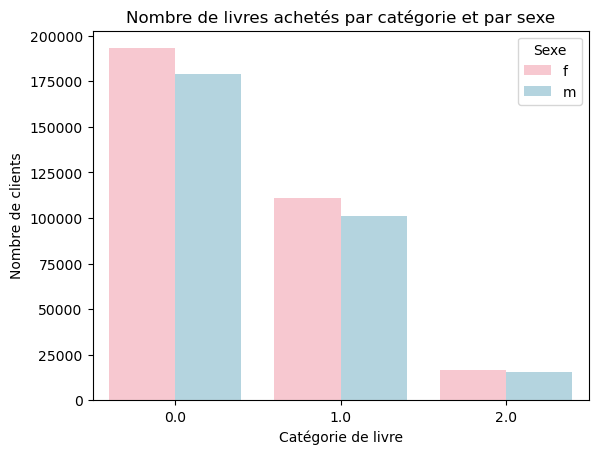

In [119]:
sns.barplot(data=df_long, x='categ', y='count', hue='sex', palette={'f': 'pink', 'm': 'lightblue'})
plt.title('Nombre de livres achetés par catégorie et par sexe')
plt.xlabel('Catégorie de livre')
plt.ylabel('Nombre de clients')
plt.legend(title='Sexe')
plt.show()

In [120]:
pivot_table = df_long.pivot(index='sex', columns='categ', values='count')

In [121]:
pivot_table

categ,0.0,1.0,2.0
sex,,,
f,193117,111174,16514
m,179039,100854,15410


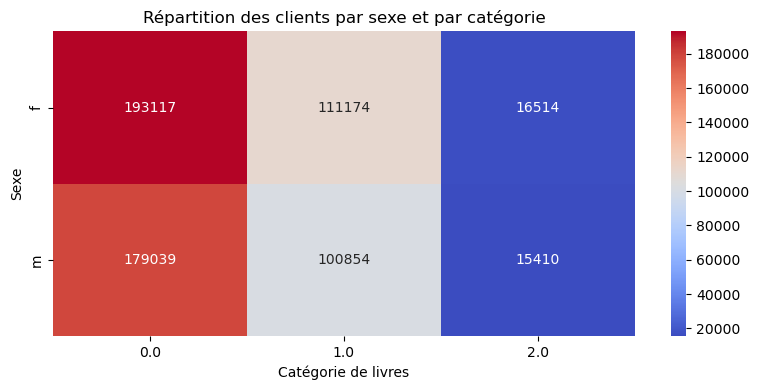

In [122]:
plt.figure(figsize=(8, 4))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="coolwarm")
plt.title("Répartition des clients par sexe et par catégorie")
plt.xlabel("Catégorie de livres")
plt.ylabel("Sexe")
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">5.3 - Lien âge client / montant achat(ama)</h3>
</div>

In [123]:
dff_Stat.head()

,client_id,sex,birth,id_prod,date,session_id,Merge1,price,categ,Merge2,year,month,age
0,c_1004,m,1973.0,0_0,2021-03-02 21:57:33.862118,s_908,both,3.75,0.0,both,2021.0,3.0,52
1,c_1011,f,1999.0,0_0,2022-03-18 16:40:10.068303,s_180968,both,3.75,0.0,both,2022.0,3.0,26
2,c_1011,f,1999.0,0_0,2022-02-18 16:40:10.068303,s_167174,both,3.75,0.0,both,2022.0,2.0,26
3,c_1011,f,1999.0,0_0,2022-04-18 16:40:10.068303,s_195932,both,3.75,0.0,both,2022.0,4.0,26
4,c_1011,f,1999.0,0_0,2023-02-18 16:40:10.068303,s_343439,both,3.75,0.0,both,2023.0,2.0,26


In [124]:
#identificaion de l'année en cours pour calculer l'age du client
année_en_cours=dt.datetime.now().year

In [125]:
#Ajout d'une colonne age 
dff_Stat["age"]=année_en_cours-dff_Stat["birth"]

In [126]:
dff_Stat['age']= dff_Stat['age'].astype('Int64')
dff_Stat['birth']= dff_Stat['birth'].astype('Int64')
dff_Stat['categ']= dff_Stat['categ'].astype('Int64')

In [127]:
dff_Stat.head(5)

,client_id,sex,birth,id_prod,date,session_id,Merge1,price,categ,Merge2,year,month,age
0,c_1004,m,1973,0_0,2021-03-02 21:57:33.862118,s_908,both,3.75,0,both,2021.0,3.0,52
1,c_1011,f,1999,0_0,2022-03-18 16:40:10.068303,s_180968,both,3.75,0,both,2022.0,3.0,26
2,c_1011,f,1999,0_0,2022-02-18 16:40:10.068303,s_167174,both,3.75,0,both,2022.0,2.0,26
3,c_1011,f,1999,0_0,2022-04-18 16:40:10.068303,s_195932,both,3.75,0,both,2022.0,4.0,26
4,c_1011,f,1999,0_0,2023-02-18 16:40:10.068303,s_343439,both,3.75,0,both,2023.0,2.0,26


In [128]:
# identification des montants d'achats par age
ama = dff_Stat.groupby("age")["price"].sum().reset_index()

In [129]:
ama.columns=["Age", "Montant_Achats"]

In [130]:
ama.sort_values('Montant_Achats',ascending=False).head(10)

,Age,Montant_Achats
0,21,594019.350000
25,46,325370.404945
16,37,323110.971648
26,47,317182.259935
18,39,301036.234967
24,45,282174.394989
21,42,274483.841605
22,43,271042.144945
20,41,263957.421627
27,48,256434.641648


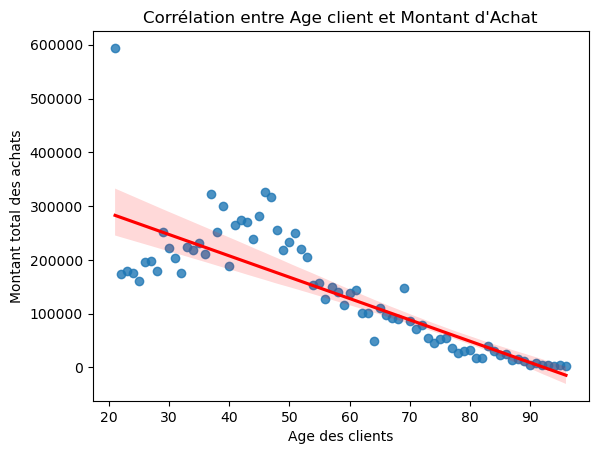

In [131]:
sns.regplot(x="Age", y="Montant_Achats", data=ama, robust=True, line_kws=dict(color='r'))
plt.xlabel("Age des clients")
plt.ylabel("Montant total des achats")
plt.title("Corrélation entre Age client et Montant d'Achat")
plt.show()

In [132]:
#Mise en place du test de Spearman
spearman_corr, spearman_p_value = spearmanr(ama['Age'], ama['Montant_Achats'])

In [133]:
#Affichage des résultats du test
print(f"Nous avons une stat de : {round(spearman_corr,2)}, et une P_value de : {round(spearman_p_value,2)}")
if spearman_p_value<0.05:
    print("L'hypothèse nulle est rejetée, l'hypothèse alternative est donc probable")
else:
    print("L'hypothèse nulle ne peut pas être rejetée")

Nous avons une stat de : -0.87, et une P_value de : 0.0
L'hypothèse nulle est rejetée, l'hypothèse alternative est donc probable


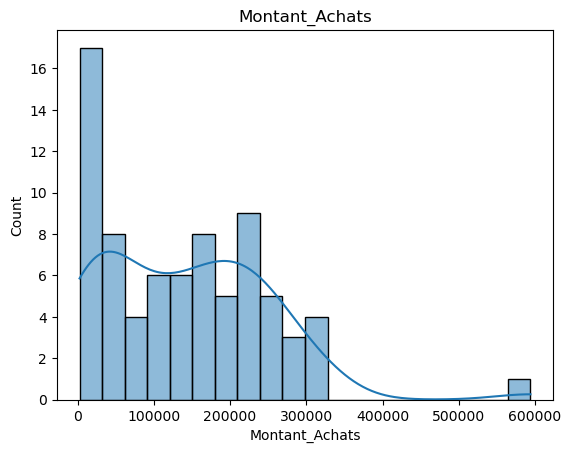

In [134]:
sns.histplot(ama['Montant_Achats'], kde=True, bins=20)
plt.title("Montant_Achats")
plt.show()

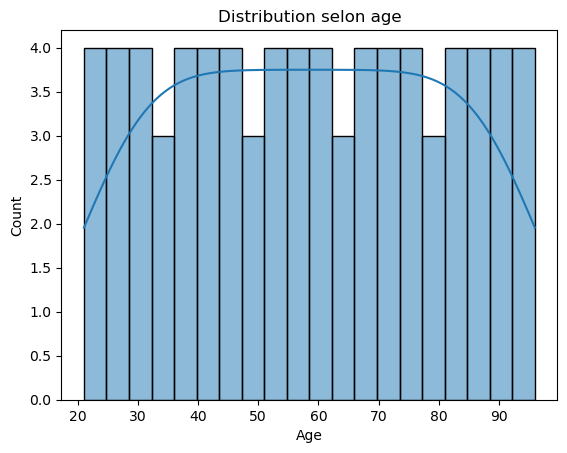

In [135]:
sns.histplot(ama['Age'], kde=True, bins=20)
plt.title("Distribution selon age")
plt.show()

In [136]:
#Mise en place du test de Pearson
r_pearson, p_pearson = pearsonr(ama['Age'], ama['Montant_Achats'])

In [137]:
#Affichage des résultats du test de Pearson
print(f"Nous avons une stat de : {round(r_pearson,2)}, et une P_value de : {round(p_pearson,2)}")
if p_pearson<0.05:
    print("L'hypothèse nulle est rejetée, l'hypothèse alternative est donc probable")
else:
    print("L'hypothèse nulle ne peut pas être rejetée")

Nous avons une stat de : -0.83, et une P_value de : 0.0
L'hypothèse nulle est rejetée, l'hypothèse alternative est donc probable


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">5.4 - Lien âge client / fréquences d'achats(afa)</h3>
</div>

In [138]:
afa=dff_Stat.groupby('age')["price"].count().reset_index()

In [139]:
afa.columns=["Age", "Fréquence_Achats"]

In [140]:
afa.sort_values("Fréquence_Achats",ascending=False).head(10)

,Age,Fréquence_Achats
16,37,24301
25,46,24085
26,47,23973
18,39,22710
24,45,21247
21,42,20700
22,43,20010
20,41,19831
27,48,19397
17,38,19045


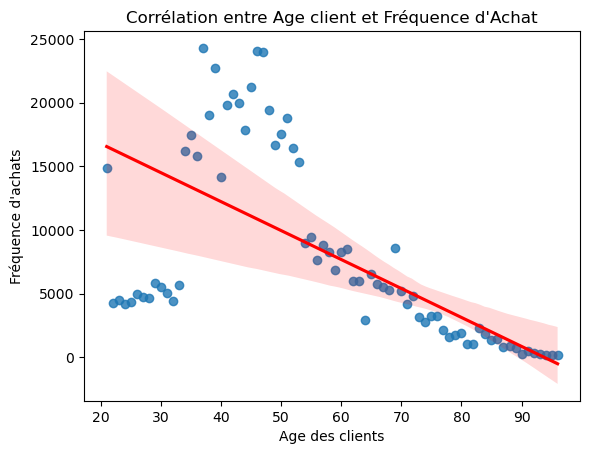

In [141]:
# Visualiser la relation âge vs fréquence d'achat
sns.regplot(x="Age", y="Fréquence_Achats", data=afa, robust=True, line_kws=dict(color='r'))
plt.xlabel("Age des clients")
plt.ylabel("Fréquence d'achats")
plt.title("Corrélation entre Age client et Fréquence d'Achat")
plt.show()

In [142]:
#Réalisation du test de spearman pour valider les hypothèses de corrélations
spearman_corr, spearman_p_value = spearmanr(afa['Age'], afa['Fréquence_Achats'])

In [143]:
print(f"Nous avons une stat de Searman de : {round(spearman_corr,2)}, et une P_value de : {round(spearman_p_value,2)}")
if spearman_p_value<0.05:
    print("L'hypothèse nulle est rejetée, l'hypothèse alternative est donc probable")
else:
    print("L'hypothèse nulle ne peut pas être rejetée")

Nous avons une stat de Searman de : -0.67, et une P_value de : 0.0
L'hypothèse nulle est rejetée, l'hypothèse alternative est donc probable


In [144]:
#Mise en place du test de Pearson
r_pearson, p_pearson = pearsonr(afa['Age'], afa['Fréquence_Achats'])

In [145]:
#Affichage des résultats du test
print(f"Nous avons une stat de Pearson de : {round(r_pearson,2)}, et une P_value de : {round(p_pearson,2)}")
if p_pearson<0.05:
    print("L'hypothèse nulle est rejetée, l'hypothèse alternative est donc probable")
else:
    print("L'hypothèse nulle ne peut pas être rejetée")

Nous avons une stat de Pearson de : -0.58, et une P_value de : 0.0
L'hypothèse nulle est rejetée, l'hypothèse alternative est donc probable


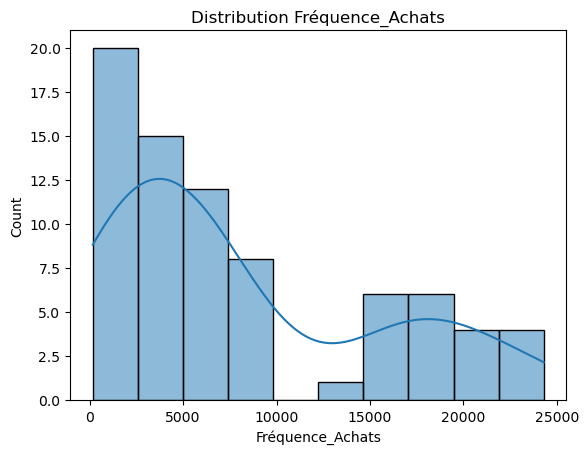

In [146]:
sns.histplot(afa['Fréquence_Achats'], kde=True, bins=10)
plt.title("Distribution Fréquence_Achats")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">5.5 - Lien entre âge du client et la taille du panier moyen (apm)</h3>
</div>


In [147]:
apm=dff_Stat.groupby('age')["price"].mean().reset_index()

In [148]:
apm.columns=["Age", "Panier_Moyen"]

In [149]:
apm.sort_values("Panier_Moyen",ascending=False).head(10)

,Age,Panier_Moyen
8,29,42.852682
6,27,41.952773
3,24,41.952692
1,22,40.791602
9,30,40.089025
10,31,40.088696
2,23,40.056470
0,21,40.033653
5,26,39.514633
11,32,39.460733


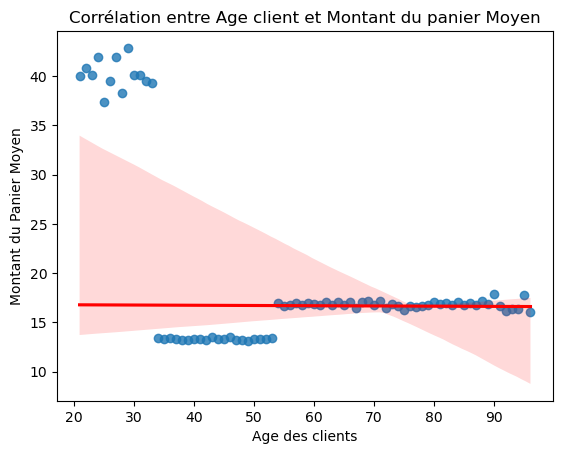

In [150]:
# Visualiser la relation âge vs Panier moyen
sns.regplot(x="Age", y="Panier_Moyen", data=apm, robust=True, line_kws=dict(color='r'))
plt.xlabel("Age des clients")
plt.ylabel("Montant du Panier Moyen")
plt.title("Corrélation entre Age client et Montant du panier Moyen")
plt.show()

In [151]:
#Mise en place du test de Spearman
spearman_corr, spearman_p_value = spearmanr(apm['Age'], apm['Panier_Moyen'])

In [152]:
print(f"Nous avons une stat de : {round(spearman_corr,2)}, et une P_value de : {round(spearman_p_value,2)}")
if spearman_p_value<0.05:
    print("L'hypothèse nulle est rejetée, l'hypothèse alternative est donc probable")
else:
    print("L'hypothèse nulle ne peut pas être rejetée")

Nous avons une stat de : -0.09, et une P_value de : 0.46
L'hypothèse nulle ne peut pas être rejetée


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">5.6 - Lien entre âge du client et les catégories des livres achetés (acl)</h3>
</div>


In [153]:
dff_Stat

,client_id,sex,birth,id_prod,date,session_id,Merge1,price,categ,Merge2,year,month,age
0,c_1004,m,1973,0_0,2021-03-02 21:57:33.862118,s_908,both,3.75,0,both,2021.0,3.0,52
1,c_1011,f,1999,0_0,2022-03-18 16:40:10.068303,s_180968,both,3.75,0,both,2022.0,3.0,26
2,c_1011,f,1999,0_0,2022-02-18 16:40:10.068303,s_167174,both,3.75,0,both,2022.0,2.0,26
3,c_1011,f,1999,0_0,2022-04-18 16:40:10.068303,s_195932,both,3.75,0,both,2022.0,4.0,26
4,c_1011,f,1999,0_0,2023-02-18 16:40:10.068303,s_343439,both,3.75,0,both,2023.0,2.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679348,c_5828,f,1998,2_99,2022-07-21 01:53:46.967570,s_241374,both,84.99,2,both,2022.0,7.0,27
679349,c_5828,f,1998,2_99,2023-01-21 01:53:46.967570,s_329932,both,84.99,2,both,2023.0,1.0,27
679350,c_7135,m,1996,2_99,2022-11-11 20:56:49.820935,s_296127,both,84.99,2,both,2022.0,11.0,29
679351,c_7135,m,1996,2_99,2022-12-11 20:56:49.820935,s_310606,both,84.99,2,both,2022.0,12.0,29


In [154]:
#Retrait des valeurs NaN pour le test ANOVA dans une DF acl
acl = dff_Stat.dropna(subset=['categ', 'age'])

In [155]:
acl.dtypes

client_id             object
sex                   object
birth                  Int64
id_prod               object
date          datetime64[ns]
session_id            object
Merge1              category
price                float64
categ                  Int64
Merge2              category
year                 float64
month                float64
age                    Int64
dtype: object

In [156]:
acl=dff_Stat.groupby(['age','categ'])["price"].count().reset_index()

In [157]:
acl.columns=["Age", "Catégorie", "Nombre"]

In [158]:
acl.head()

,Age,Catégorie,Nombre
0,21,0,3292
1,21,1,5707
2,21,2,5839
3,22,0,854
4,22,1,1674


In [159]:
Correlation = acl[['Age',  'Catégorie', 'Nombre']].corr()
#Création d'un heatmap de correlation avec les variables stock, sales et price
#on peut également créer un mask pour n'afficher qu'une demi heatmap
mask = np.triu(np.ones_like(Correlation, dtype=bool))

<Axes: >

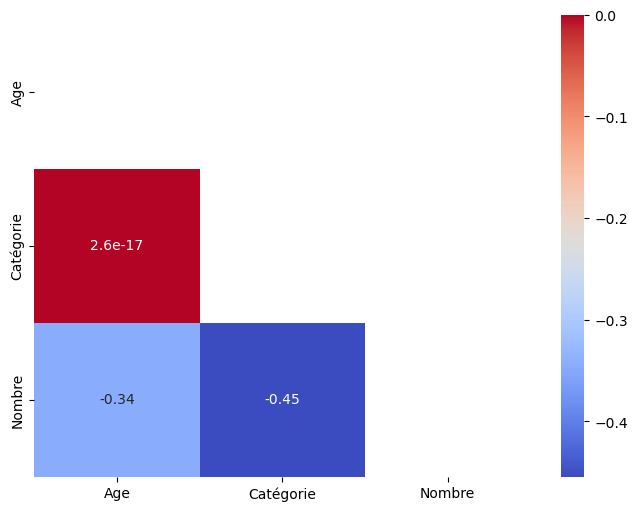

In [160]:
plt.figure(figsize=(8, 6))
sns.heatmap(Correlation, annot=True, cmap='coolwarm', mask=mask)

In [161]:
Cat0 = dff_Stat[dff_Stat['categ'] == 0]['age'].dropna()
Cat1 = dff_Stat[dff_Stat['categ'] == 1]['age'].dropna()
Cat2 = dff_Stat[dff_Stat['categ'] == 2]['age'].dropna()

In [162]:
f_stat, p_value = f_oneway(Cat0, Cat1, Cat2)

In [163]:
print(f"Nous avons un coef de : {round(f_stat,2)}, et une P_value de : {round(p_value,2)}")
if p_value<0.05:
    print("L'hypothèse nulle est rejetée, l'hypothèse alternative est donc probable")
else:
    print("L'hypothèse nulle ne peut pas être rejetée")

Nous avons un coef de : 39266.29, et une P_value de : 0.0
L'hypothèse nulle est rejetée, l'hypothèse alternative est donc probable


<Axes: xlabel='categ', ylabel='age'>

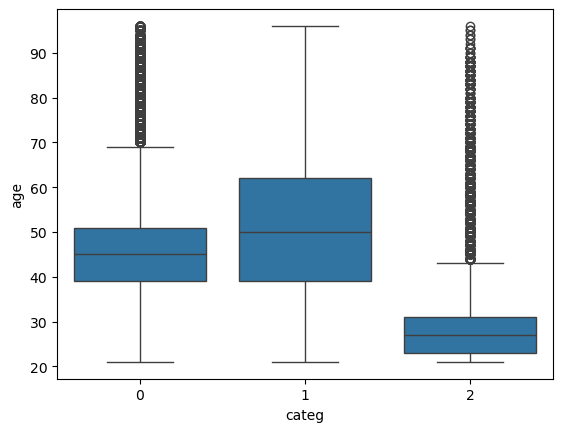

In [164]:
# On visualise nos variables d'intérêts
sns.boxplot(y="age", x="categ", data=dff_Stat)
